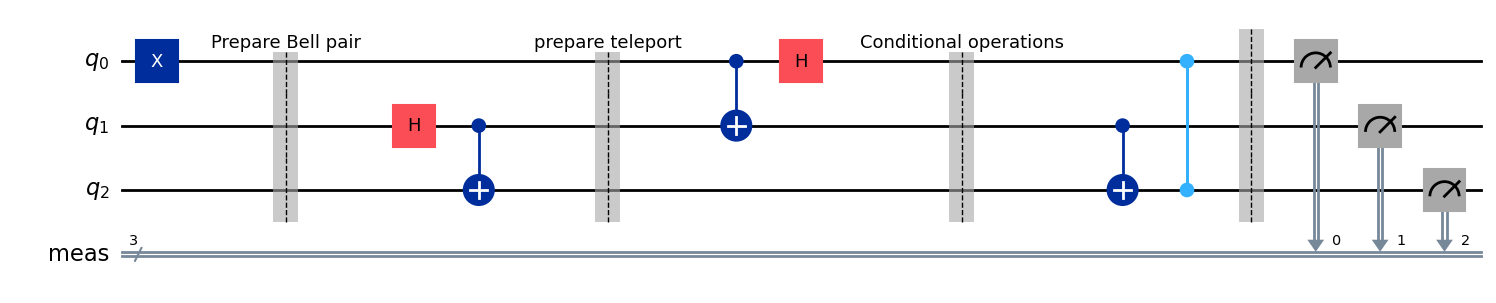

In [3]:
# Import pacakges
from math import pi
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import SamplerV2 as sampler
from qiskit.visualization import plot_histogram

# Create quantum circuit
qc = QuantumCircuit(3)

# Prepare state to be teleported
#qc.ry(3*pi/2,qr[0])
qc.x(0)

#create Bell pair
qc.barrier(label='Prepare Bell pair')

qc.h(1)
qc.cx(1,2)

# Prepare state teleportation
qc.barrier(label='prepare teleport')
qc.cx(0,1)
qc.h(0)

# Condicional operation for state teleportation
qc.barrier(label='Conditional operations')

qc.cx(1,2)
qc.cz(0,2)

# Measurements
qc.measure_all()

qc.draw('mpl')

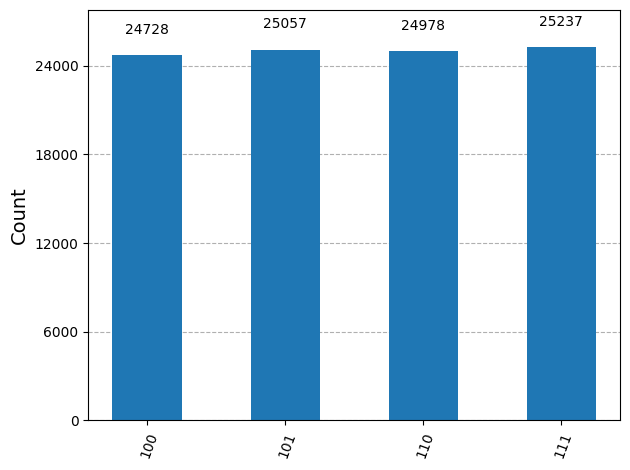

In [4]:
# Initiate simulator
simulator = AerSimulator()

n_shots = 100000

# Generate circuit
transpiled_qc = transpile(qc, simulator, optimization_level=3)

# Run job with Sampler
job = sampler().run([transpiled_qc], shots=n_shots)

# Extract results
result = job.result()[0]
counts = result.data.meas.get_counts()

plot_histogram(counts)